In [1]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Breast_Cancer.csv")

In [3]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
df.shape

(4024, 16)

In [5]:
y = df[['Status']]
x = df.drop(["Status"], axis= 1)

In [6]:
le = LabelEncoder()
one = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [7]:
y = le.fit_transform(y)

c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
cat_cols = x.select_dtypes(include=['object', 'category']).columns
num_cols = x.select_dtypes(include=['int64', 'float64']).columns

In [9]:
x = pd.get_dummies(x)


In [10]:
x.shape

(4024, 39)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42, test_size=.2)

In [12]:
bag = BaggingClassifier(max_features=3) # by default Decision tree

In [13]:
model = bag.fit(x_train, y_train)

In [18]:
model.score(x_train, y_train)

0.8459148803976391

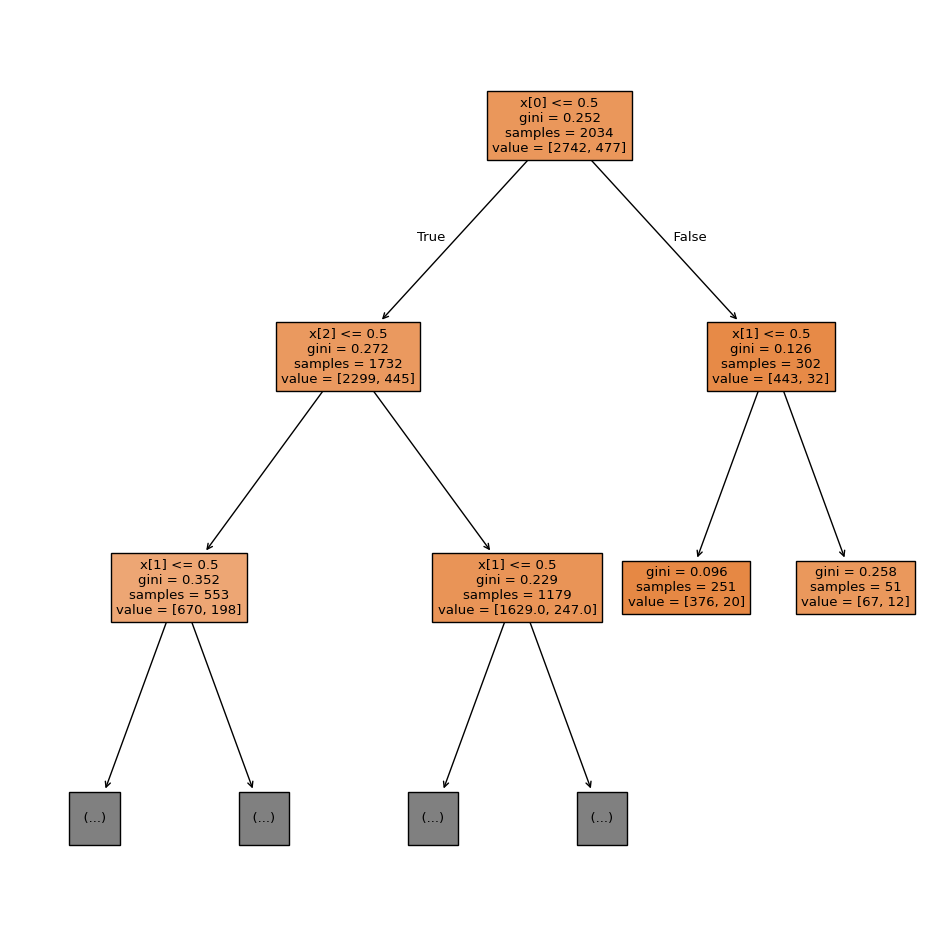

In [14]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0], filled=True, max_depth=2)
plt.show()

In [15]:
random = RandomForestClassifier(n_estimators=3)

In [16]:
model2 = random.fit(x_train, y_train)

In [19]:
model2.score(x_train, y_train)

0.9683131407269339

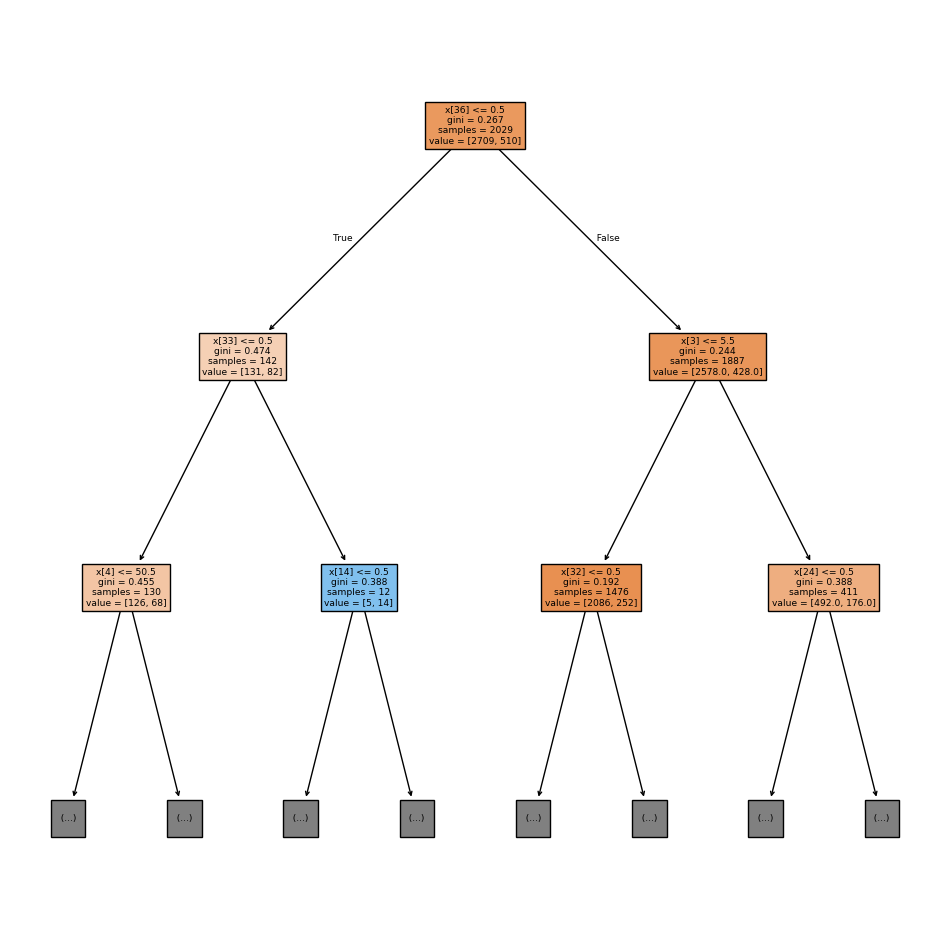

In [17]:
plt.figure(figsize=(12,12))
plot_tree(random.estimators_[0], filled=True, max_depth=2)
plt.show()